Let's build a support vector machine model for the following classification problem. The input features are x<sub>1</sub> and x<sub>2</sub>, and output is y where 0 and 1 represent two different categories.

x<sub>1</sub>|x<sub>2</sub> |y
-----|-----|----- 
1.35|0.311|0
2.019|0.687|1
1.659|1.247|1
1.566|0.323|0
1.74|0.765|1
1.603|0.924|1
2.194|-0.401|0
1.202|1.581|1
1.93|1.052|1
1.196|1.544|1
2.021|-0.157|0
1.32|0.272|0
1.823|1.062|1
1.169|0.734|0
1.226|1.771|1
1.107|0.78|0
2.031|-0.354|0
1.487|1.272|1
1.921|0.011|0
1.932|0.994|1
1.59|-0.056|0
1.758|0.142|0



We're using the python package scikit-learn to find the optimal **linear kernel** support vector machine model to classify the data, and draw the decision boundary together with the data points.

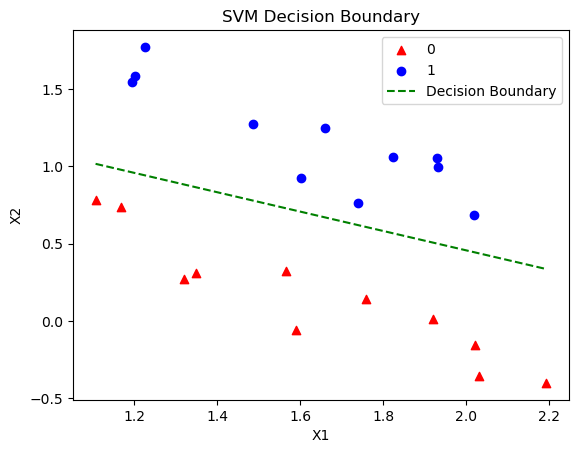

Training accuracy: 1.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define your data
x1 = [1.35, 2.019, 1.659, 1.566, 1.74, 1.603, 2.194, 1.202, 1.93, 1.196, 2.021, 1.32, 1.823, 1.169, 1.226, 1.107, 2.031, 1.487, 1.921, 1.932, 1.59, 1.758]
x2 = [0.311, 0.687, 1.247, 0.323, 0.765, 0.924, -0.401, 1.581, 1.052, 1.544, -0.157, 0.272, 1.062, 0.734, 1.771, 0.78, -0.354, 1.272, 0.011, 0.994, -0.056, 0.142]
y = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
X = np.column_stack((x1, x2))

# SVM model with a linear kernel
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Coefficients of the SVM model
inter = model.intercept_[0]
coef = model.coef_[0]

# Separate the data based on 0's and 1's
x1_0 = [x1[i] for i in range(len(y)) if y[i] == 0]
x2_0 = [x2[i] for i in range(len(y)) if y[i] == 0]
x1_1 = [x1[i] for i in range(len(y)) if y[i] == 1]
x2_1 = [x2[i] for i in range(len(y)) if y[i] == 1]

# Create the plot
plt.scatter(x1_0, x2_0, c='red', label='0', marker='^') 
plt.scatter(x1_1, x2_1, c='blue', label='1', marker='o') 
plt.xlabel('X1') 
plt.ylabel('X2')

x_db = np.array([min(x1), max(x1)])
y_db = (-inter - coef[0] * x_db) / coef[1]
plt.plot(x_db, y_db, label='Decision Boundary', c='green', linestyle='--')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

print(f'Training accuracy: {accuracy_score(y,model.predict(X))}')

Let's add one more data point given by x<sub>1</sub>=1.92, x<sub>2</sub>=0.66, and y=0 to the previous dataset. We'll find out how the regularization parameter affects the decision boundary.

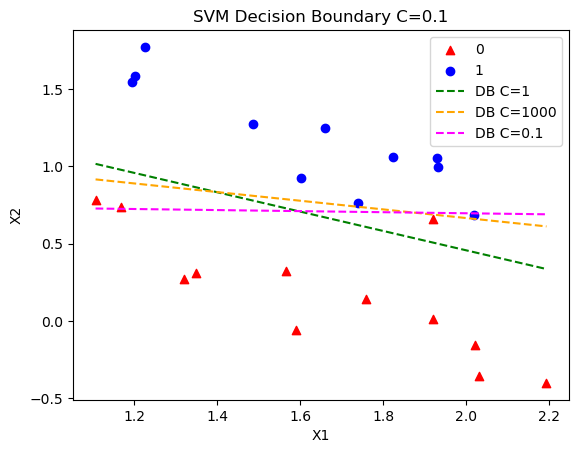

Training accuracy with C=1: 0.9565217391304348
Training accuracy with C=1000: 1.0
Training accuracy with C=0.1: 0.8695652173913043


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define your data
x1 = [1.35, 2.019, 1.659, 1.566, 1.74, 1.603, 2.194, 1.202, 1.93, 1.196, 2.021, 1.32, 1.823, 1.169, 1.226, 1.107, 2.031, 1.487, 1.921, 1.932, 1.59, 1.758, 1.92]
x2 = [0.311, 0.687, 1.247, 0.323, 0.765, 0.924, -0.401, 1.581, 1.052, 1.544, -0.157, 0.272, 1.062, 0.734, 1.771, 0.78, -0.354, 1.272, 0.011, 0.994, -0.056, 0.142, 0.66]
y = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
X = np.column_stack((x1, x2))

# SVM model with a linear kernel
model1 = SVC(kernel='linear', C=1)
model1.fit(X, y)
model2 = SVC(kernel='linear', C=1000)
model2.fit(X, y)
model3 = SVC(kernel='linear', C=0.1)
model3.fit(X, y)

# Coefficients of the SVM model
inter1 = model1.intercept_[0]
coef1 = model1.coef_[0]
inter2 = model2.intercept_[0]
coef2 = model2.coef_[0]
inter3 = model3.intercept_[0]
coef3 = model3.coef_[0]

# Separate the data based on 0's and 1's
x1_0 = [x1[i] for i in range(len(y)) if y[i] == 0]
x2_0 = [x2[i] for i in range(len(y)) if y[i] == 0]
x1_1 = [x1[i] for i in range(len(y)) if y[i] == 1]
x2_1 = [x2[i] for i in range(len(y)) if y[i] == 1]

# Create the plot
plt.scatter(x1_0, x2_0, c='red', label='0', marker='^') 
plt.scatter(x1_1, x2_1, c='blue', label='1', marker='o') 
plt.xlabel('X1') 
plt.ylabel('X2')

x_db1 = np.array([min(x1), max(x1)])
y_db1 = (-inter1 - coef1[0] * x_db1) / coef1[1]
x_db2 = np.array([min(x1), max(x1)])
y_db2 = (-inter2 - coef2[0] * x_db2) / coef2[1]
x_db3 = np.array([min(x1), max(x1)])
y_db3 = (-inter3 - coef3[0] * x_db3) / coef3[1]
plt.plot(x_db1, y_db1, label='DB C=1', c='green', linestyle='--')
plt.title('SVM Decision Boundary C=1')
plt.plot(x_db2, y_db2, label='DB C=1000', c='orange', linestyle='--')
plt.title('SVM Decision Boundary C=1000')
plt.plot(x_db3, y_db3, label='DB C=0.1', c='fuchsia', linestyle='--')
plt.title('SVM Decision Boundary C=0.1')
plt.legend()
plt.show()

print(f'Training accuracy with C=1: {accuracy_score(y,model1.predict(X))}')
print(f'Training accuracy with C=1000: {accuracy_score(y,model2.predict(X))}')
print(f'Training accuracy with C=0.1: {accuracy_score(y,model3.predict(X))}')

# Introducing a new point that acts as an outlier we can investigate how the regularization parameter works.
# The results show that a C=1 provides with a good decision boundary that is expected to generalize well.
# A very large C (C=1000) attempts to classify all points perfectly as the penalization for misclassification is too large.
# The distance between the decision boundary and the support vectors is much smaller so the margin is a lot narrower.
# This large C is very likely to fail at generalization.
# A C that is too small (C=0.1) yields a horizontal line and allows too many misclassifications, this model would perform poorly
# given that it is a model too simple for the nature of the dataset.
# C = 1 is just right providing a good balance between maximizing the margin and minimizing the classification error.
# It's okay that it allows for a misclassification of the outlier as it allows for better generalization in the end.
# The accuracy for each model is printed out, and we can see how a large C exhibits signs of overfitting with a perfect accuracy.
# The model with a balanced C performs just right and with a low C it misses the mark.
